In [1]:
#This script requires that reduce.sh has been executed from the BoGPoster directory
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
losses_opt1=pd.read_hdf('../H2_0.2_OPT_1_mu_0.001.losses.h5')

In [3]:
losses_optH=pd.read_hdf('../H2_0.2_OPT_0.5_mu_0.001.losses.h5') #H = 'half' = 0.5

In [4]:
losses_opt1.reset_index(inplace=True,drop=True)
losses_optH.reset_index(inplace=True,drop=True)

In [5]:
means1=losses_opt1.groupby(['generation']).median()
means1.reset_index(inplace=True)
meansH=losses_optH.groupby(['generation']).median()
meansH.reset_index(inplace=True)

In [6]:
meansH['scaled_time']=pd.Series(meansH.generation-np.array([10000]*len(meansH.index)))
meansH['scaled_time']/=pd.Series(np.array([1000]*len(meansH.index)))
means1['scaled_time']=pd.Series(means1.generation-np.array([10000]*len(means1.index)))
means1['scaled_time']/=pd.Series(np.array([1000]*len(means1.index)))

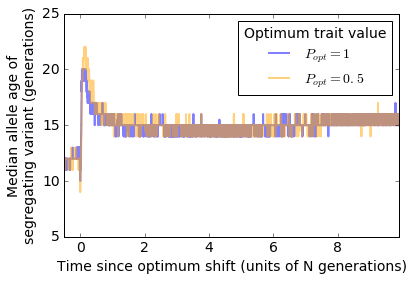

In [10]:
#There are some reps that are totally crazy,
#With mutations that pre-date optimum shift,
#And segregate and end of simulation!  
#There are 5 such reps, and they really mess up the mean,
#hence plotting median.
#I need to make sure there is no data processing bug up
#to this point when it is time to write the paper...
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams.update({'legend.fontsize': 14})
fig=matplotlib.pyplot.gcf()
fig.set_size_inches(10,12)
plt.figure()
plt.plot(means1.scaled_time,means1.age,label=r'$P_{opt} = 1$',linewidth=2,color='blue',alpha=0.5)
plt.plot(meansH.scaled_time,meansH.age,label=r'$P_{opt} = 0.5$',linewidth=2,color='orange',alpha=0.5)
plt.xlim(-0.5,9.9)
plt.ylim(5,25)
plt.xlabel("Time since optimum shift (units of N generations)",fontsize=14)
plt.ylabel("Median allele age of\nsegregating variant (generations)",fontsize=14)
plt.legend(title="Optimum trait value")
plt.savefig("AlleleAges.pdf",bbox_inches='tight')

In [8]:
x=losses_opt1[losses_opt1.generation==20000]

In [17]:
len(x.index)

5

In [18]:
print(x)

              esize    freq  generation  origin       pos  rep      age
28673068   0.086482  0.2875       20000    9754  0.594926  156  10247.0
48263355   0.008778  0.0310       20000    9523  0.047203  262  10478.0
71737871  -0.020324  0.8620       20000    9057  0.135625  390  10944.0
167059469 -0.003373  0.8805       20000    9858  0.152635  908  10143.0
169224013  0.008812  0.3325       20000    9557  0.559852  920  10444.0


In [20]:
#xx=losses_opt1[(losses_opt1.rep==390) & (losses_opt1.origin==9057)]
xx=losses_opt1[(losses_opt1.rep==390)]# & (losses_opt1.origin==9057)]

In [21]:
#xx.head()

In [22]:
xxg=xx.groupby(['esize','pos'])

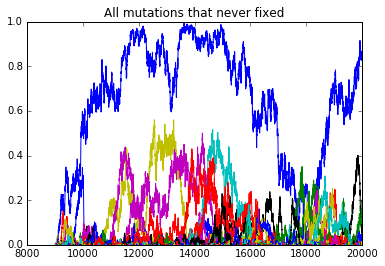

In [32]:
plt.figure()
for i in xxg.groups:
    t=xxg.get_group(i)
    plt.plot(t.generation,t.freq)
plt.title("All mutations that never fixed")

In [24]:
##Let's look at fixations for that same replicate...
fix_opt1=pd.read_hdf('../H2_0.2_OPT_1_mu_0.001.fixations.h5')

In [25]:
fix_opt1.reset_index(inplace=True,drop=True)

In [28]:
xf=fix_opt1[fix_opt1.rep==390]

In [29]:
xfg=xf.groupby(['pos','esize'])

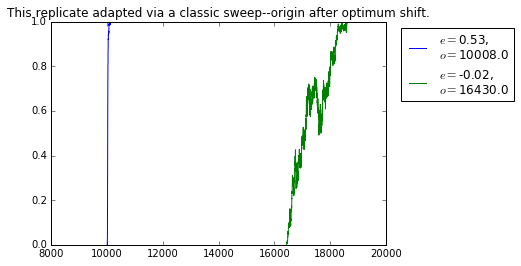

In [50]:
plt.figure()
for i in xfg.groups:
    temp=xfg.get_group(i)
    esize=temp.esize.mean()
    origin=temp.origin.mean()
    plt.plot(temp.generation,temp.freq,label=r'$e = $'+'{0:0.2f}'.format(esize)+',\n'+r'$o = $'+str(origin))
plt.xlim(8000,20000)
plt.title("This replicate adapted via a classic sweep--origin after optimum shift.")
plt.legend(bbox_to_anchor=(1.4,1))

In [51]:
losses_optH[losses_optH.generation==20000]

,esize,freq,generation,origin,pos,rep,age
21283872,0.038362,0.7615,20000,9819,0.405391,116,10182.0
34575971,0.015851,0.7205,20000,9947,0.911900,188,10054.0
108693547,0.030220,0.1850,20000,9378,0.989748,590,10623.0
152182175,0.046543,0.7200,20000,9728,0.591946,826,10273.0
160897452,0.152215,0.6860,20000,9999,0.299304,873,10002.0


In [52]:
losses_opt1[losses_opt1.generation==20000]

,esize,freq,generation,origin,pos,rep,age
28673068,0.086482,0.2875,20000,9754,0.594926,156,10247.0
48263355,0.008778,0.0310,20000,9523,0.047203,262,10478.0
71737871,-0.020324,0.8620,20000,9057,0.135625,390,10944.0
167059469,-0.003373,0.8805,20000,9858,0.152635,908,10143.0
169224013,0.008812,0.3325,20000,9557,0.559852,920,10444.0
